In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [23]:
tf = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

In [24]:
tf

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      effective_to_date month employment_status gender  income  ...  \
0               2/18/11   feb          employed      m   48029  ...   
1               1/18/11   jan        unemployed      f   92260  ...   
2               2/10/11   feb          employed      m   22139  ...   
3               1/11/11   jan          employed      m   49078  ...   
4               1/17/11   jan     medical leave      f   23675  ...   
...                 ...   ...               ...    ...     ...  ...   
10684           1/19/11   jan        unemployed      f   61541  ...   
10685            1/6/11   jan          employed      f   61146  ...   
10686            2/6/11   feb          employed      f   39837  ...   
10687           2/13/11   feb          employed      f   64195  ...   
10688            1/8/11   jan        unemployed      m   68942  ...   

      months_since_policy_inception number_of_open_complaints  \
0                                52                         0   
1                                26                         0   
2                                31                         0   
3                                 3                         0   
4                                31                         0   
...                             ...                       ...   
10684                            40                         0   
10685                            68                         0   
10686                            63                         0   
10687                            27                         4   
10688                             1                         0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  corporate auto  corporate l3            offer3   
1                       1   personal auto   personal l3            offer4   
2                       2   personal auto   personal l3            offer3   
3                       2  corporate auto  corporate l3            offer2   
4                       7   personal auto   personal l2            offer1   
...                   ...             ...           ...               ...   
10684                   7   personal auto   personal l1            offer3   
10685                   6   personal auto   personal l3            offer2   
10686                   2  corporate auto  corporate l3            offer1   
10687                   6   personal auto   personal l1            offer1   
10688                   3   personal auto   personal l1            offer4   

       sales_channel total_claim_amount  vehicle_class vehicle_size  
0              agent                292  four-door car      medsize  
1        call center                744  four-door car      medsize  
2        call center                480            suv      medsize  
3             branch                484  four-door car      medsize  
4             branch                707  four-door car      medsize  
...              ...                ...            ...          ...  
10684            web               1214     luxury

In [38]:
numericals = tf.select_dtypes(include=np.number)

In [31]:
categoricals = tf.select_dtypes(include=['object'])
#categoricals.drop('effective_to_date')
def drop_columns(ca_df) :
    ca_df.drop(columns=['effective_to_date'], inplace=True)
    return ca_df
drop_columns(categoricals)
categoricals

region response  coverage education month employment_status  \
0          central       no     basic   college   feb          employed   
1      west region       no     basic   college   jan        unemployed   
2             east       no     basic  bachelor   feb          employed   
3       north west      yes  extended   college   jan          employed   
4       north west       no   premium  bachelor   jan     medical leave   
...            ...      ...       ...       ...   ...               ...   
10684      central       no   premium  bachelor   jan        unemployed   
10685   north west       no     basic   college   jan          employed   
10686      central       no  extended  bachelor   feb          employed   
10687  west region       no   premium   college   feb          employed   
10688      central       no     basic  bachelor   jan        unemployed   

      gender location_code marital_status     policy_type        policy  \
0          m      suburban        married  corporate auto  corporate l3   
1          f      suburban         single   personal auto   personal l3   
2          m      suburban         single   personal auto   personal l3   
3          m      suburban         single  corporate auto  corporate l3   
4          f      suburban        married   personal auto   personal l2   
...      ...           ...            ...             ...           ...   
10684      f      suburban        married   personal auto   personal l1   
10685      f         urban        married   personal auto   personal l3   
10686      f         rural        married  corporate auto  corporate l3   
10687      f         urban       divorced   personal auto   personal l1   
10688      m      suburban         single   personal auto   personal l1   

      renew_offer_type sales_channel  vehicle_class vehicle_size  
0               offer3         agent  four-door car      medsize  
1               offer4   call center  four-door car      medsize  
2               offer3   call center            suv      medsize  
3               offer2        branch  four-door car      medsize  
4               offer1        branch  four-door car      medsize  
...                ...           ...            ...          ...  
10684           offer3           web     luxury car      medsize  
10685           offer2        branch  four-door car      medsize  
10686           offer1           web     luxury suv      medsize  
10687           offer1        branch            suv      medsize  
10688           offer4           web            suv      medsize  

[10689 rows x 15 columns]

In [32]:
tf_mod = tf[['region', 'customer_lifetime_value', 'response', 'coverage','education', 'effective_to_date', 'month', 'employment_status','gender', 'income', 'location_code', 'marital_status','monthly_premium_auto', 'months_since_last_claim','months_since_policy_inception', 'number_of_open_complaints','number_of_policies', 'policy_type', 'policy', 'renew_offer_type','sales_channel', 'vehicle_class', 'vehicle_size']]

In [33]:
correlations = tf_mod.corr()
correlations

customer_lifetime_value    income  \
customer_lifetime_value                       1.000000  0.003732   
income                                        0.003732  1.000000   
monthly_premium_auto                          0.404235 -0.002431   
months_since_last_claim                       0.011912 -0.026564   
months_since_policy_inception                 0.017055  0.003846   
number_of_open_complaints                    -0.032371  0.018903   
number_of_policies                            0.016789 -0.004461   

                               monthly_premium_auto  months_since_last_claim  \
customer_lifetime_value                    0.404235                 0.011912   
income                                    -0.002431                -0.026564   
monthly_premium_auto                       1.000000                 0.010036   
months_since_last_claim                    0.010036                 1.000000   
months_since_policy_inception              0.019696                -0.034086   
number_of_open_complaints                 -0.008811                 0.001204   
number_of_policies                        -0.018805                 0.000814   

                               months_since_policy_inception  \
customer_lifetime_value                             0.017055   
income                                              0.003846   
monthly_premium_auto                                0.019696   
months_since_last_claim                            -0.034086   
months_since_policy_inception                       1.000000   
number_of_open_complaints                           0.002554   
number_of_policies                                 -0.009719   

                               number_of_open_complaints  number_of_policies  
customer_lifetime_value                        -0.032371            0.016789  
income                                          0.018903           -0.004461  
monthly_premium_auto                           -0.008811           -0.018805  
months_since_last_claim                         0.001204            0.000814  
months_since_policy_inception                   0.002554           -0.009719  
number_of_open_complaints                       1.000000           -0.000303  
number_of_policies                             -0.000303            1.000000

<AxesSubplot:>

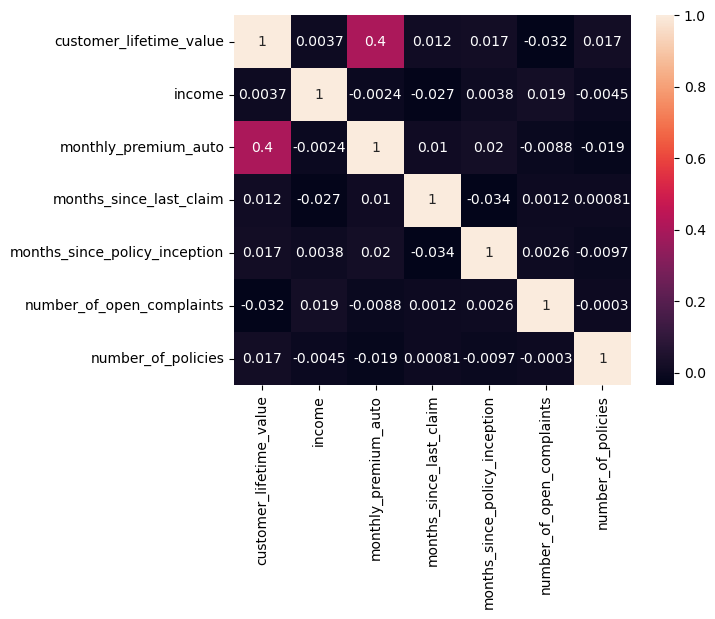

In [29]:
sns.heatmap(correlations,annot=True)

In [37]:
one_hot_encoded_data = pd.get_dummies(categoricals)
one_hot_encoded_data.head()

region_central  region_east  region_north west  region_west region  \
0               1            0                  0                   0   
1               0            0                  0                   1   
2               0            1                  0                   0   
3               0            0                  1                   0   
4               0            0                  1                   0   

   response_no  response_yes  coverage_basic  coverage_extended  \
0            1             0               1                  0   
1            1             0               1                  0   
2            1             0               1                  0   
3            0             1               0                  1   
4            1             0               0                  0   

   coverage_premium  education_bachelor  ...  sales_channel_web  \
0                 0                   0  ...                  0   
1                 0                   0  ...                  0   
2                 0                   1  ...                  0   
3                 0                   0  ...                  0   
4                 1                   1  ...                  0   

   vehicle_class_four-door car  vehicle_class_luxury car  \
0                            1                         0   
1                            1                         0   
2                            0                         0   
3                            1                         0   
4                            1                         0   

   vehicle_class_luxury suv  vehicle_class_sports car  vehicle_class_suv  \
0                         0                         0                  0   
1                         0                         0                  0   
2                         0                         0                  1   
3                         0                         0                  0   
4                         0                         0                  0   

   vehicle_class_two-door car  vehicle_size_large  vehicle_size_medsize  \
0                           0                   0                     1   
1                           0                   0                     1   
2                           0                   0                     1   
3                           0                   0                     1   
4                           0                   0                     1   

   vehicle_size_small  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 58 columns]

In [39]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

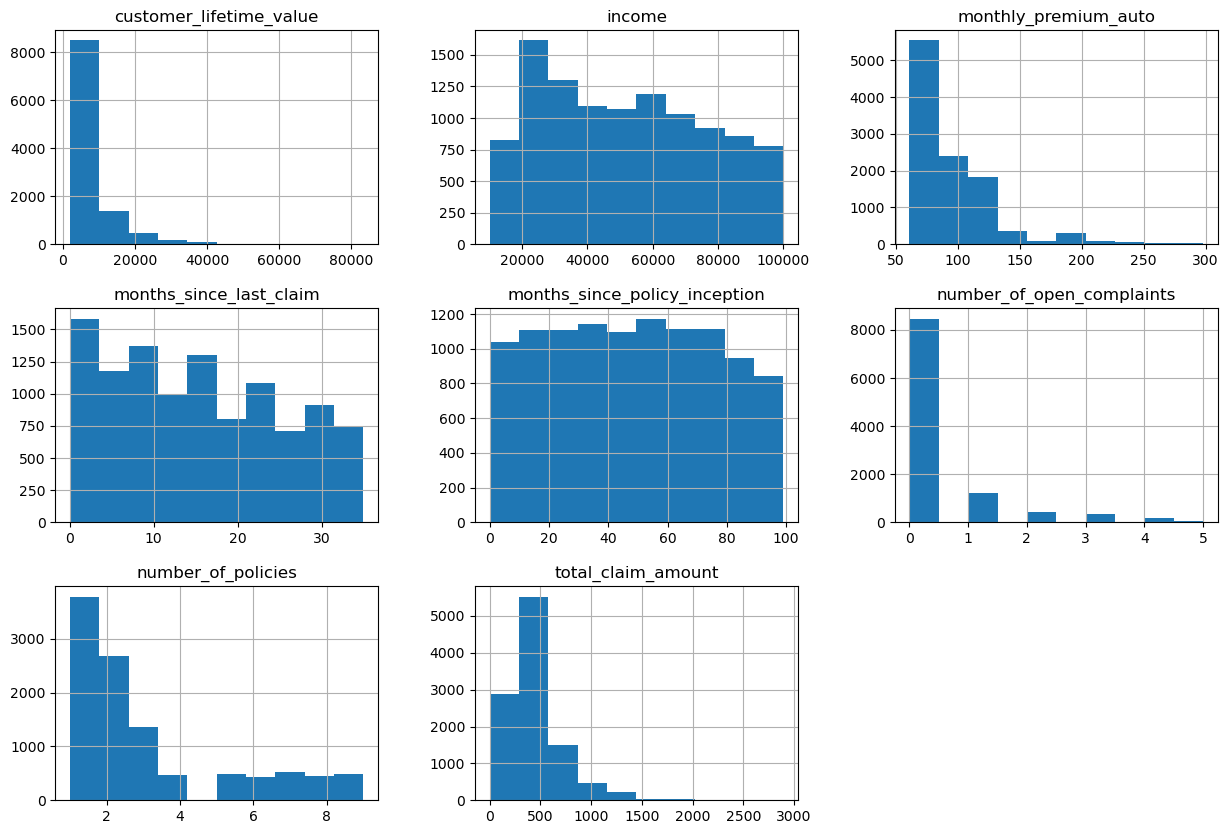

In [41]:
numericals.hist(figsize=(15,10));

In [72]:
#data = data.reshape((len(data),1))

In [85]:
varA = pd.DataFrame(tf['income'])
varA.head()

income
0   48029
1   92260
2   22139
3   49078
4   23675

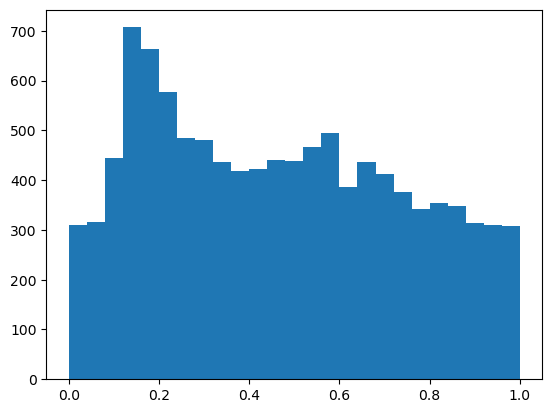

In [88]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
# define data
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(varA)
plt.hist(scaled, bins=25)
plt.show()

In [84]:
from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
varB = pd.DataFrame(tf['monthly_premium_auto'])
varB.head()

monthly_premium_auto
0                    61
1                    64
2                   100
3                    97
4                   117

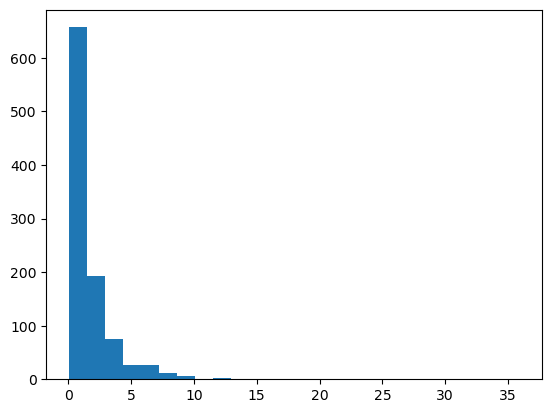

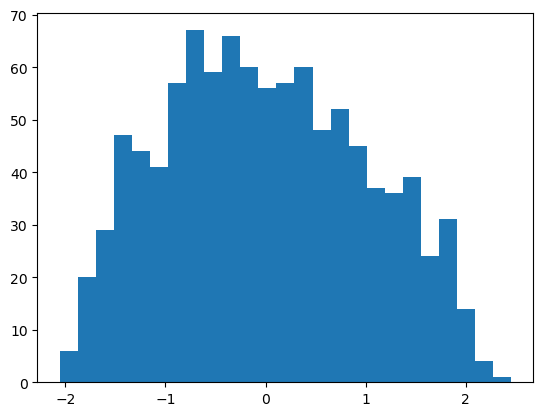

3.979039320256561e-16

In [97]:
from numpy import exp
from numpy.random import randn
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot
# generate gaussian data sample
data = randn(1000)
# add a skew to the data distribution
data = exp(data)

# histogram of the raw data with a skew
pyplot.hist(data, bins=25)
pyplot.show()
# reshape data to have rows and columns
data = data.reshape((len(data),1))
# power transform the raw data
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(data)
# histogram of the transformed data
pyplot.hist(data_trans, bins=25)
pyplot.show()
np.mean(data_trans)

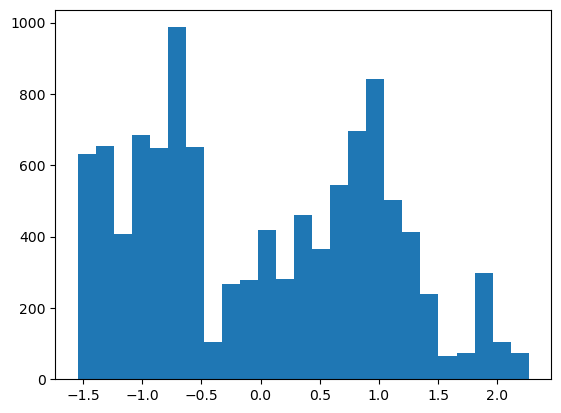

-8.533027300830856e-14

In [90]:
power = PowerTransformer(method='box-cox', standardize=True)
data_trans = power.fit_transform(varB)
plt.hist(data_trans, bins=25)
plt.show()
data_trans.mean()